Detection of Pneomonia from Chest X-Ray

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
img_width, img_height = 256, 256
batchsize = 32
epochs = 10
num_of_class = 2

In [3]:
train = keras. utils.image_dataset_from_directory(
    directory="C:\\Users\\Sahishnav Kritin\\archive (1)\\chest_xray\\chest_xray\\train",
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.


In [4]:
test = keras. utils.image_dataset_from_directory(
    directory="C:\\Users\\Sahishnav Kritin\\archive (1)\\chest_xray\\chest_xray\\test" ,
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 624 files belonging to 2 classes.


In [5]:
validation = keras. utils.image_dataset_from_directory(
    directory="C:\\Users\\Sahishnav Kritin\\archive (1)\\chest_xray\\chest_xray\\val" ,
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 16 files belonging to 2 classes.


In [6]:
xtrain = []
ytrain = []
xtest = []
ytest = []

for feature, label in train:
    xtrain.append(feature.numpy())
    ytrain.append(label.numpy())

for feature, label in test:
    xtest.append(feature.numpy())
    ytest.append(label.numpy())

x = np.concatenate(xtrain, axis=0)
xtest = np.concatenate(xtest, axis=0)
y = np.concatenate(ytrain, axis=0)
ytest = np.concatenate(ytest, axis=0)

In [7]:
xtrain, xval,ytrain, yval = train_test_split(x,y ,random_state=104, test_size=0.12, shuffle=True)

In [8]:
print("Shape of 'x_train':", xtrain.shape)
print("Shape of 'y_train':", ytrain.shape)
print("Shape of 'x_val':", xval.shape)
print("Shape of 'y_val':", yval.shape)
print("Shape of 'x_test':", xtest.shape)
print("Shape of 'y_test':", ytest.shape)

Shape of 'x_train': (4590, 256, 256, 3)
Shape of 'y_train': (4590, 2)
Shape of 'x_val': (626, 256, 256, 3)
Shape of 'y_val': (626, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


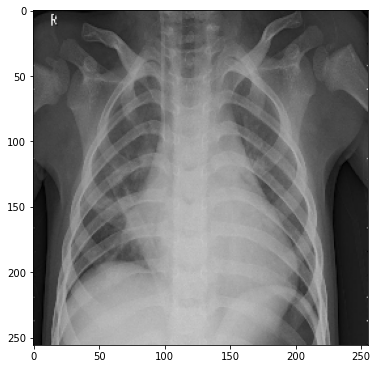

In [9]:
im=plt.figure(figsize=(6, 12))
plt.imshow(xtrain[2].astype(int))
plt.show()

<BarContainer object of 3 artists>

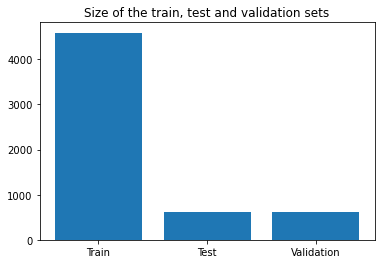

In [10]:
bar={"Train" : len(xtrain),"Test" : len(xtest),"Validation" : len(xval)}
data = list(bar.keys())
size = list(bar.values())
plt.title("Size of the train, test and validation sets")
plt.bar(data,size)

In [11]:
xtrain=xtrain/256
xval=xval/256
xtest=xtest/256

CNN Model

In [23]:
base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    
for layer in base_model.layers:
    layer.trainable = False

for i in range(3):
    base_model.layers[-2-i].trainable = True
cnn = Sequential([
    Input(shape=(img_width, img_height,3)),
    base_model,
    
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu',kernel_regularizer=l2(0.05)),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

58889256/58889256 [==============================] - 7s 0us/step


In [24]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = cnn.fit(xtrain, ytrain, epochs= 10, validation_data= (xval, yval))
print(hist.history)

Epoch 1/10
163/163 [==============================] - 936s 6s/step - loss: 0.1351 - accuracy: 0.9837 - val_loss: 0.5179 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 898s 6s/step - loss: 0.1036 - accuracy: 0.9850 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 3/10
163/163 [==============================] - 896s 5s/step - loss: 0.0616 - accuracy: 0.9891 - val_loss: 0.6215 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 900s 6s/step - loss: 0.0701 - accuracy: 0.9895 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 928s 6s/step - loss: 0.0592 - accuracy: 0.9906 - val_loss: 0.0887 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 897s 6s/step - loss: 0.0421 - accuracy: 0.9923 - val_loss: 0.2077 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 927s 6s/step - loss: 0.0334 - accuracy: 0.9942 - val_loss: 0.4378 - val_accuracy: 0.8125

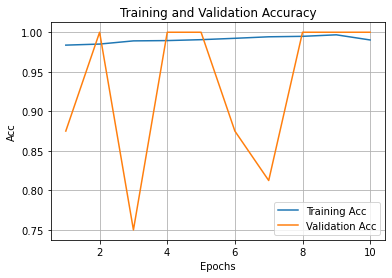

In [20]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Best Validation score is: 1.0
